In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
data=pd.read_csv("C:/Users/Rohit/Desktop/DS Assignments/logistic regression/bank-full.csv",sep=';')
data[0:5]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.shape

(45211, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [8]:
default = data ['default'].map({'yes': 1, 'no': 0})
default

0        0
1        0
2        0
3        0
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: default, Length: 45211, dtype: int64

<AxesSubplot:xlabel='default', ylabel='count'>

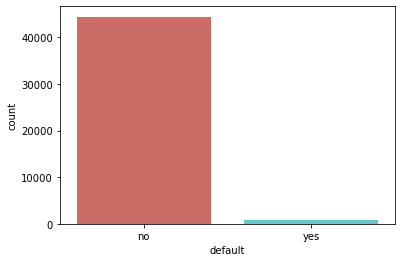

In [9]:
sb.countplot(x = "default", data=data, palette="hls")

In [10]:
data.drop(['contact', 'poutcome'], axis=1)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,no


<AxesSubplot:xlabel='marital', ylabel='count'>

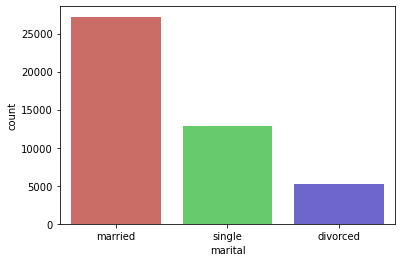

In [11]:
sb.countplot(x = "marital", data=data, palette="hls")

<AxesSubplot:xlabel='loan', ylabel='count'>

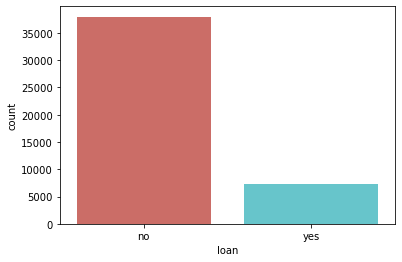

In [12]:
sb.countplot(x = "loan", data=data, palette="hls")

In [13]:
data.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [14]:
DATA = pd.get_dummies(data, columns=['job','marital', 'education', 'contact','poutcome','month'])
DATA

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
pd.set_option("display.max.columns", None)
DATA

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,yes,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [16]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  uint8 
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

In [17]:
DATA['default'] = np.where(DATA['default'].str.contains("yes"), 1, 0)
DATA['housing'] = np.where(DATA['housing'].str.contains("yes"), 1, 0)
DATA['loan'] = np.where(DATA['loan'].str.contains("yes"), 1, 0)
DATA['y'] = np.where(DATA['y'].str.contains("yes"), 1, 0)
DATA

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [18]:
DATA1 = DATA.drop(['y'], axis=1)
DATA1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [19]:
x = DATA1.iloc[:,0:48]
x 

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [20]:
y = DATA.iloc[:,10]
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [21]:
classifier = LogisticRegression()
classifier.fit(x,y)

C:\Users\Rohit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred = classifier.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [23]:
ypred= pd.DataFrame({'actual': y,
                         'predicted_prob': classifier.predict(x)})

In [24]:
ypred

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [25]:
confusio_matrix = confusion_matrix
confusio_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [26]:
(39156+1162)/(39156+766+4127+1162)

0.8917741257658535

In [27]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.60      0.24      0.34      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.61      0.64     45211
weighted avg       0.87      0.89      0.87     45211



In [28]:
 classifier.predict_proba (x)[:,1]

array([0.07492124, 0.04715403, 0.03633441, ..., 0.60951773, 0.08914892,
       0.25963757])

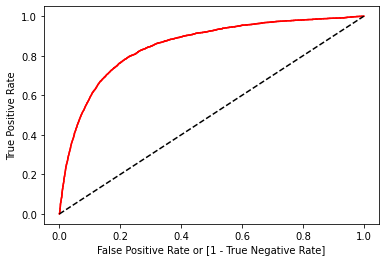

auc accuracy: 0.6077130987766852


In [29]:
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)